In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [84]:
df = pd.read_table("./data/glove.6B.50d.txt", delimiter=" ", header=None, index_col=0, quoting=3)

In [37]:
df = pd.DataFrame(pd.read_csv("./data/minimal.50d.3f.csv")).set_index("0")

In [63]:
df = pd.DataFrame(pd.read_csv("./data/minimal.50d.4f.csv")).set_index("0")

In [85]:
words = set(df.index)

In [86]:
"happy" in words

True

In [87]:
whatever = ["happy", "sad", 
            "rich", "poor", 
            "important", "unimportant",
            "good", "bad", "evil", 
            "healthy", "ill", 
            "high", "low", "up", "down", 
            "conscious", "unconscious",
           #            "rational", "emotional",
            "more", "less",
#          "idealistic", "down-to-earth", "practical",
           "unknown", "known",
           "finished", "incomplete", "complete",
            "positive", "negative", 
           "big", "small", "little", "enormous",
           "beginning", "end",
           "future", "past",
           "spirit", "body",
           #          "sky", "ground",
#           "heavenly", "hell", "salvation",
           "virtuous", "sinful", 
#           "central", "peripheral",
#           "urban", "rural",
           "active", "passive",
           "hot", "cold", 
            
           "loud", "quiet",
#          "expensive", "cheap", "costly",
            "normal", "eccentric", "strange",
            "front", "back",
            "on", "off"
           ]

In [88]:
df.loc[whatever].dot(df.loc["up"] - df.loc["down"])#.sort_values()

0
happy          1.792510
sad            0.859652
rich           2.887585
poor           1.318398
important      3.025564
unimportant    0.512193
good           2.627740
bad            0.421010
evil          -0.104641
healthy        2.670279
ill            0.473419
high           0.571788
low           -0.054458
up             0.198731
down          -2.510700
conscious      1.154757
unconscious   -1.804858
more           2.675395
less           1.854727
unknown        0.756882
known          1.728611
finished       0.342291
incomplete    -0.124750
complete       1.921671
positive       1.353585
negative      -0.037737
big            1.956931
small          1.809458
little         1.090575
enormous       1.925197
beginning      0.476204
end           -0.460891
future         2.099606
past           0.322365
spirit         1.254198
body           0.913171
virtuous       0.565870
sinful         0.127401
active         1.835548
passive        0.279218
hot            0.745637
cold          

In [89]:
lens = (df**2).sum(axis=1).sort_values()
dfn = df.div(np.sqrt(lens), axis='index')

/home/julia/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:4256: RuntimeWarning: unorderable types: str() > float(), sort order is undefined for incomparable objects
  return_indexers=True)


In [90]:
dfn.loc[whatever].dot(dfn.loc["up"] - dfn.loc["down"])#.sort_values()

0
happy          0.095834
sad            0.041788
rich           0.133326
poor           0.076774
important      0.134327
unimportant    0.021824
good           0.121742
bad            0.041315
evil           0.008659
healthy        0.118995
ill            0.037197
high           0.048983
low            0.026908
up             0.047655
down          -0.047655
conscious      0.067241
unconscious   -0.058271
more           0.124270
less           0.095337
unknown        0.047791
known          0.087818
finished       0.037913
incomplete     0.003356
complete       0.101683
positive       0.068029
negative       0.017816
big            0.099964
small          0.094177
little         0.071844
enormous       0.094020
beginning      0.046715
end            0.015697
future         0.109063
past           0.045926
spirit         0.065085
body           0.055716
virtuous       0.027246
sinful         0.001841
active         0.094324
passive        0.021221
hot            0.051407
cold          

In [91]:
height = df.loc["up"] - df.loc["down"]
second = df.loc["good"] - df.loc["bad"]
proj = pd.DataFrame([height, second], index=["height", "second"]).transpose()

In [92]:
df_plot = df.loc[whatever].dot(proj)
df_plot["name"] = df_plot.index
df_plot

,height,second,name
0,,,
happy,1.792510,4.115847,happy
sad,0.859652,-1.944277,sad
rich,2.887585,5.006661,rich
poor,1.318398,0.510735,poor
important,3.025564,5.795462,important
unimportant,0.512193,-1.783902,unimportant
good,2.627740,6.257723,good
bad,0.421010,-4.757310,bad
evil,-0.104641,-0.360397,evil


In [93]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


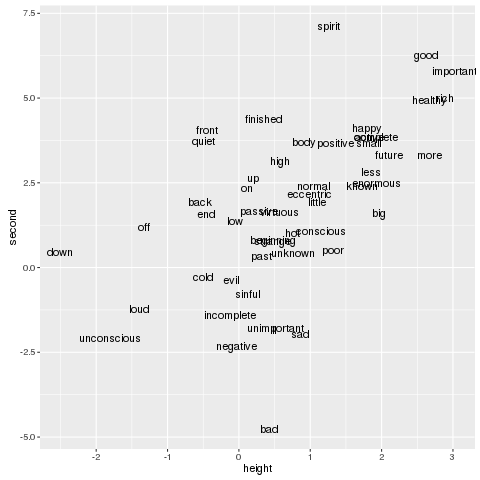

In [73]:
%%R -i df_plot
library(ggplot2)

ggplot(df_plot, aes(height, second, label=name)) +
  geom_text()

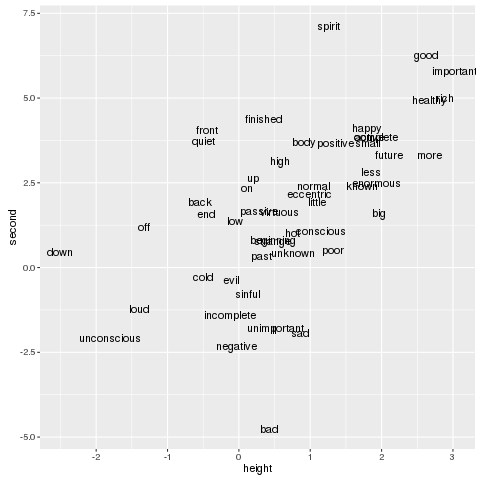

In [94]:
%%R -i df_plot
library(ggplot2)

ggplot(df_plot, aes(height, second, label=name)) +
  geom_text()